# TASK 2: Replacer (MRU)

Реализовать в Champsim политику замещения для L2 кэша и сравнить ее с LRU на наборе benchmark-ов из 1-го задания. В качестве политики замещения можно взять любую (Pseuso-LRU, MRU, LFU, ARC, 2Q, NRU, Mockingjay, Hawkeye, etc) кроме тех, что в Champsim уже есть.

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
sys.path.append('../task1/')
from my_utils import *

CHAMPSIM_PATH = '/home/dadrozdov/repos/ChampSim'
TRACES_PATH = '/home/dadrozdov/repos/ChampSim/tasks/task_traces'

WARMUP_INSTRUCTIONS = 5_000_000
SIMULATION_INSTRUCTIONS = 20_000_000

In [ ]:
base_metrics = obtain_perf_metrics(TRACES_PATH, CHAMPSIM_PATH, "champsim_config_lru.json")

In [ ]:
mru_metrics = obtain_perf_metrics(TRACES_PATH, CHAMPSIM_PATH, "champsim_config_mru.json")

In [17]:
import pandas as pd

# pd.DataFrame(base_metrics).to_csv("base_metrics.csv")
# pd.DataFrame(mru_metrics).to_csv("mru_metrics.csv")
base_metrics = pd.read_csv("base_metrics.csv", index_col=0)
mru_metrics = pd.read_csv("mru_metrics.csv", index_col=0)

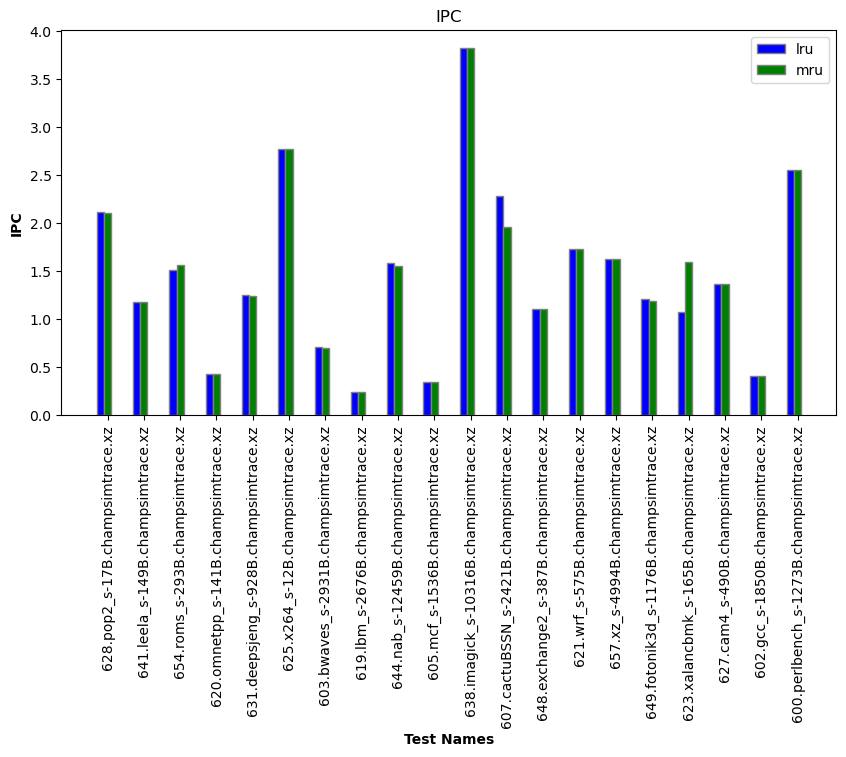

In [19]:
plot_metric([base_metrics, mru_metrics], 0, "IPC", ["lru", "mru"])

In [21]:
base_ipc_s = list(map(lambda x: x[1][0], base_metrics.items()))
oracle_ipc_s = list(map(lambda x: x[1][0], mru_metrics.items()))
total = 0
for b, o in zip(base_ipc_s, oracle_ipc_s):
  total += o / b - 1
print(f"Average IPC increase {total / len(base_ipc_s) * 100} %")

Average IPC increase 1.5147704833580984 %


In [24]:
# compute hit rate
base_hitrate = {}
mru_hitrate = {}
for (base_trace, base_m), (mru_trace, mru_m) in zip(base_metrics.items(), mru_metrics.items()):
  base_hitrate[base_trace] = (base_m[4] / base_m[3] * 100,)
  mru_hitrate[mru_trace] = (mru_m[4] / mru_m[3] * 100,)

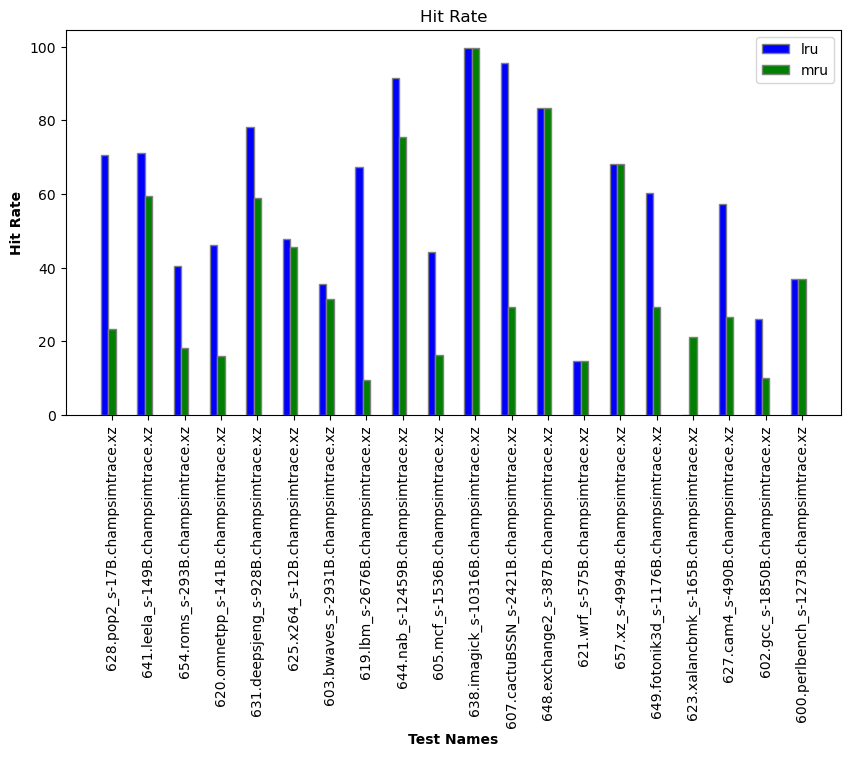

In [25]:
plot_metric([base_hitrate, mru_hitrate], 0, "Hit Rate", ["lru", "mru"])
